In [1]:
# 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv("bank_data_train.csv", sep=",",encoding="latin")

In [3]:
data = data.drop_duplicates()

In [4]:
size = data.shape # Returns the number of rows and columns 
dims = data.ndim # Returns the number of dimensions
print('This dataset is {} and so, {}-dimensional'.format(size, dims))

This dataset is (88627, 72) and so, 2-dimensional


In [5]:
# data.corr()
# Var_Corr = data.corr()
# plot the heatmap and annotation on it
# sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [5]:
null=data.isna().sum()/len(data)
null[null>0].sort_values()

fecha_nacimiento    0.001049
profesion           0.031514
estado_civil        0.160380
n_hijos             0.195200
nivel_estudios      0.467578
tipo_gestor         0.806662
ctsitir             0.967098
dtype: float64

In [6]:
data1 = data.drop(['id_cliente','fecha_nacimiento','fecha_registro','profesion','estado_civil','n_hijos',
                   'nivel_estudios','tipo_gestor','ctsitir','volumen_haber','saldo_total','spendpr'],1)

In [7]:
data1 = pd.get_dummies(data1, columns=['genero'], drop_first=True)

In [8]:
y=data1['churn']
x=data1.drop('churn',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [9]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.742
Accuracy score (validation): 0.741
Learning rate:  0.075
Accuracy score (training): 0.749
Accuracy score (validation): 0.749
Learning rate:  0.1
Accuracy score (training): 0.753
Accuracy score (validation): 0.753
Learning rate:  0.25
Accuracy score (training): 0.774
Accuracy score (validation): 0.775
Learning rate:  0.5
Accuracy score (training): 0.778
Accuracy score (validation): 0.778
Learning rate:  0.75
Accuracy score (training): 0.782
Accuracy score (validation): 0.780
Learning rate:  1
Accuracy score (training): 0.781
Accuracy score (validation): 0.777


In [10]:
#modelo baseline1, hecho con train y test, sin Xvalidation
gb_clf2 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.75, random_state=0)
gb_clf2.fit(x_train, y_train)
predictions = gb_clf2.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[14313  2297]
 [ 3382  6597]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     16610
           1       0.74      0.66      0.70      9979

    accuracy                           0.79     26589
   macro avg       0.78      0.76      0.77     26589
weighted avg       0.78      0.79      0.78     26589



In [11]:
#modelo baseline2, hecho con train y test, sin Xvalidation
rf = RandomForestClassifier(min_samples_leaf = 3, random_state=123)
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.8261388181437184
0.7943886569634059


In [12]:
predictions = rf.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[14644  1966]
 [ 3501  6478]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.88      0.84     16610
           1       0.77      0.65      0.70      9979

    accuracy                           0.79     26589
   macro avg       0.79      0.77      0.77     26589
weighted avg       0.79      0.79      0.79     26589



In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88627 entries, 0 to 89995
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              88627 non-null  int64  
 1   churn                   88627 non-null  int64  
 2   fecha_nacimiento        88534 non-null  object 
 3   fecha_registro          88627 non-null  object 
 4   genero                  88627 non-null  object 
 5   profesion               85834 non-null  float64
 6   nivel_estudios          47187 non-null  float64
 7   estado_civil            74413 non-null  object 
 8   n_hijos                 71327 non-null  float64
 9   pais                    88627 non-null  int64  
 10  nacionalidad            88627 non-null  int64  
 11  oficina_asociada        88627 non-null  int64  
 12  tipo_gestor             17135 non-null  object 
 13  indicador_autonomo      88627 non-null  int64  
 14  volumen_haber           88627 non-null

In [14]:
data.isnull().sum().head(60) 

id_cliente                    0
churn                         0
fecha_nacimiento             93
fecha_registro                0
genero                        0
profesion                  2793
nivel_estudios            41440
estado_civil              14214
n_hijos                   17300
pais                          0
nacionalidad                  0
oficina_asociada              0
tipo_gestor               71492
indicador_autonomo            0
volumen_haber                 0
renta_estimada                0
n_operaciones_oficina         0
n_operaciones_web             0
n_operaciones_app             0
n_operaciones_telefono        0
n_operaciones_cajero          0
n_operaciones_tpv             0
saldo_total                   0
spendpr                       0
impsitir                      0
ctsitir                   85711
nomina_domiciliada            0
pension_domiciliada           0
indip                         0
indag                         0
indss                         0
inprod  

In [15]:
data.drop(data[data.fecha_nacimiento.isnull()].index, inplace = True) # solo 93, quitamos las filas

In [16]:
data.nivel_estudios.value_counts()

20.0    14238
30.0     9467
10.0     5911
40.0     5142
50.0     5022
60.0     1789
51.0      900
54.0      851
61.0      700
62.0      690
52.0      588
65.0      538
64.0      389
63.0      363
53.0      309
55.0      270
70.0       18
Name: nivel_estudios, dtype: int64

In [17]:
data2 = data.drop(['nivel_estudios'],1) # eliminamos este variable por tener mas de 50% nulls

In [18]:
data2.profesion.value_counts()

81.0    16618
72.0    14938
73.0    12085
82.0    11204
83.0     6258
86.0     4556
33.0     3969
91.0     3270
53.0     3223
11.0     1723
74.0     1010
71.0      873
23.0      844
31.0      520
54.0      507
52.0      497
32.0      462
69.0      418
12.0      304
42.0      302
70.0      260
85.0      206
61.0      202
65.0      184
66.0      168
21.0      156
41.0      142
22.0      141
84.0      137
75.0      129
62.0      109
76.0       87
10.0       60
64.0       55
51.0       50
63.0       46
68.0       31
56.0       25
24.0       16
55.0       13
67.0       11
40.0        9
13.0        3
80.0        3
60.0        3
Name: profesion, dtype: int64

In [19]:
data2['profesion']=data2['profesion'].fillna(81.0) # fill con moda

In [20]:
data2.estado_civil.value_counts()

C    40720
S    24512
V     3825
D     1852
F     1646
T     1339
P      332
H      173
R        1
Name: estado_civil, dtype: int64

In [21]:
data2['estado_civil']=data2['estado_civil'].fillna('C') # fill con la moda

In [22]:
data2['n_hijos']=data2['n_hijos'].fillna(np.mean(data2['n_hijos'])) # fill con la media

In [23]:
data2 = data2.drop(['tipo_gestor','ctsitir'],1) # eliminamos por tener mas de 80% nulls

In [24]:
data2 = pd.get_dummies(data2, columns=['genero','estado_civil'], drop_first=True) # turn into dummies 

In [25]:
data2 = data2.drop(['id_cliente'],1)  # eliminamos por ser atributo irrelevante

In [26]:
data2['anyOperation'] = np.where(
    (data2['n_operaciones_oficina']!=0) | (data2['n_operaciones_web']!=0) | (data2['n_operaciones_app']!=0) | (data2['n_operaciones_telefono']!=0) | (data2['n_operaciones_cajero']!=0) | (data2['n_operaciones_tpv']!=0), 1, 0)
# feature engineering: creamos un nuevo atributo indicando si ha hecho el cliente alguna operacion o no 

In [27]:
data2 = data2.drop(['n_operaciones_oficina','n_operaciones_web','n_operaciones_app',
                    'n_operaciones_telefono','n_operaciones_cajero','n_operaciones_tpv'],1)
# reduccion de la dimension del dataset

In [28]:
def procesar_edad(row):
    edad=2020-int(row['fecha_nacimiento'][6:10])
    #antiguedad=2020-int(row['fecha_registro'][6:10])
    #volumen_haber=int(row['volumen_haber'].replace('.',''))
    #spendpr=int(row['spendpr'].replace('.',''))
    #saldo_total=int(row['saldo_total'].replace('.',''))
    #return [edad,antiguedad,volumen_haber,spendpr,saldo_total]
    return edad
def procesar_antiguedad(row):
    antiguedad=2020-int(row['fecha_registro'][6:10])
    #volumen_haber=int(row['volumen_haber'].replace('.',''))
    #spendpr=int(row['spendpr'].replace('.',''))
    #saldo_total=int(row['saldo_total'].replace('.',''))
    #return [edad,antiguedad,volumen_haber,spendpr,saldo_total]
    return antiguedad
def procesar_volumen(row):
    volumen_haber=int(row['volumen_haber'].replace('.',''))
    #spendpr=int(row['spendpr'].replace('.',''))
    #saldo_total=int(row['saldo_total'].replace('.',''))
    #return [edad,antiguedad,volumen_haber,spendpr,saldo_total]
    return volumen_haber
def procesar_spendpr(row):
    spendpr=int(row['spendpr'].replace('.',''))
    #saldo_total=int(row['saldo_total'].replace('.',''))
    return spendpr
def procesar_saldo(row):
    saldo_total=int(row['saldo_total'].replace('.',''))
    return saldo_total

# feature engineering: calculamos las edades de los clientes; la antiguedad de los clientes y
# transformamos los valores numericos de formato 'raro' al formato int

In [29]:
data2['edad']=0
data2['antiguedad']=0
data2['edad']=data2.apply(lambda row: procesar_edad(row), axis=1)
data2['antiguedad']=data2.apply(lambda row: procesar_antiguedad(row), axis=1)
data2['volumen_haber']=data2.apply(lambda row: procesar_volumen(row), axis=1)
data2['spendpr']=data2.apply(lambda row: procesar_spendpr(row), axis=1)
data2['saldo_total']=data2.apply(lambda row: procesar_saldo(row), axis=1)

In [30]:
data2 = data2.drop(['fecha_nacimiento', 'fecha_registro'],1)

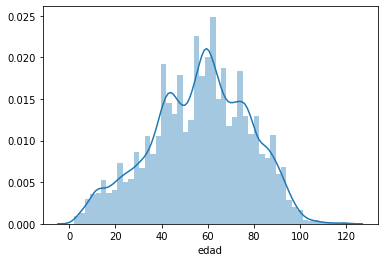

In [31]:
sns.distplot(data2["edad"]) # muy normal, muy bien

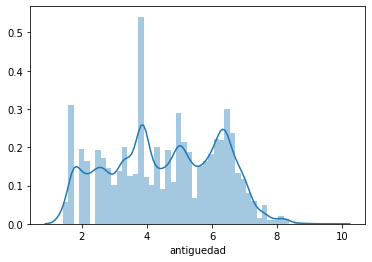

In [32]:
sns.distplot(np.sqrt(data2["antiguedad"])) #transformamos
data2["antiguedad"]=np.sqrt(data2["antiguedad"])

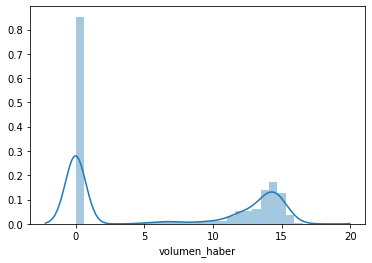

In [33]:
sns.distplot(np.log(data2["volumen_haber"]+1)) #La mayoria concentra en un mismo rango de valor(0.8)
# sumamos 1 porque no existe log0
data2["volumen_haber"]=np.log(data2["volumen_haber"]+1)

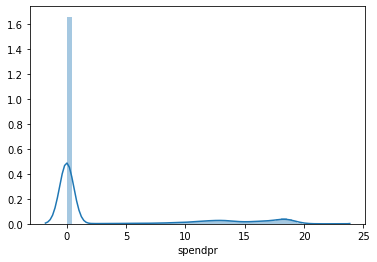

In [34]:
sns.distplot(np.log(data2["spendpr"]+1)) #lo mismo que el anterior
data2["spendpr"]=np.log(data2["spendpr"]+1)

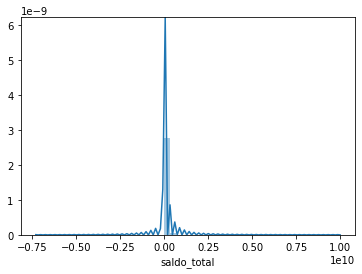

In [35]:
sns.distplot(data2["saldo_total"]) #no lo podemos transformar porque hay negativo

In [100]:
y=data2['churn']
x=data2.drop('churn',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [101]:
data2.shape

(88534, 70)

In [38]:
from sklearn.model_selection import GridSearchCV
parameters_gb = {'learning_rate':[0.2, 0.3, 0.4, 0.5], 'n_estimators':[100, 150, 200, 250]}
gb_clf=GradientBoostingClassifier()
gb_clf_grid = GridSearchCV(gb_clf, parameters_gb, cv=3)
gb_clf_grid.fit(x_train, y_train)

parameters_rf = {'min_samples_leaf':[2, 3, 5, 7, 10], 'n_estimators':[150, 200, 250, 300]}
rfc=RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, parameters_rf, cv=3)
rfc_grid.fit(x_train, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [102]:
gb= gb_clf_grid.best_estimator_
gb

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [103]:
train_gb = gb.predict(x_test)

In [106]:
train_rf = rf.predict(x_test)

In [107]:
confusion_matrix(y_test, train_gb)
#14665: true negative
#6483 true positive
#2016 false positive
#3397 false negative

array([[14665,  2016],
       [ 3397,  6483]], dtype=int64)

In [127]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [130]:
print(f1_score(y_test, train_gb))
print(accuracy_score(y_test, train_gb))
print(precision_score(y_test, train_gb))

0.7054790793840796
0.7962049621625692
0.7627956230144723


In [131]:
confusion_matrix(y_test, train_rf)

array([[14692,  1989],
       [ 3343,  6537]], dtype=int64)

In [137]:
print(f1_score(y_test, train_rf))
print(accuracy_score(y_test, train_rf))
print(precision_score(y_test, train_rf))

0.7103118548299467
0.7992545461390761
0.766713581984518


In [139]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [140]:
gb.fit(x_resampled, y_resampled)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [141]:
train_gb = gb.predict(x_test)
confusion_matrix(y_test, train_gb)

array([[13894,  2787],
       [ 2960,  6920]], dtype=int64)

In [142]:
print(f1_score(y_test, train_gb))
print(accuracy_score(y_test, train_gb))
print(precision_score(y_test, train_gb))

0.7065911063460458
0.7836301344075901
0.7128876068816318


In [150]:
import warnings
warnings.filterwarnings("ignore")

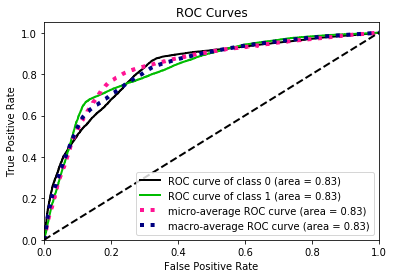

In [151]:
# gradient boosting
import scikitplot as skplt
import matplotlib.pyplot as plt

prob_test = gb.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test, prob_test)
plt.show()

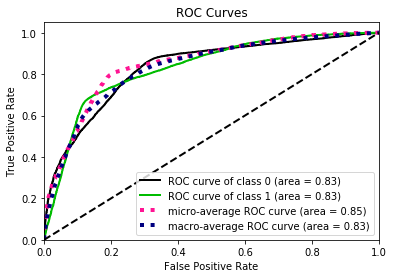

In [152]:
# RandomForest
prob_test = rf.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test, prob_test)
plt.show()

In [135]:
y_test[y_test==0]

49798    0
2052     0
18471    0
31580    0
11470    0
        ..
45452    0
7712     0
27392    0
73934    0
81403    0
Name: churn, Length: 16681, dtype: int64

In [85]:
datafinal=pd.read_csv("datafinal.csv", sep=",",encoding="latin")

In [87]:
pr= gb.predict(datafinal)

In [54]:
parameters_rf = {'min_samples_leaf':[2, 3, 5, 7, 10], 'n_estimators':[150, 200, 250, 300]}
rfc=RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, parameters_rf, cv=3)
rfc_grid.fit(x_train, y_train) 

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [104]:
rf = rfc_grid.best_estimator_

In [105]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test)) # poco sobreajuste, pero en el test tampoco sale muy mal

0.9217885208074484
0.7992545461390761


In [97]:
prediction = rf.predict(datafinal)

In [364]:
data3 = data2.drop(['fecha_nacimiento', 'fecha_registro', 'volumen_haber','spendpr','saldo_total'],1)

In [365]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88534 entries, 0 to 89995
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   churn                88534 non-null  int64  
 1   profesion            88534 non-null  float64
 2   n_hijos              88534 non-null  float64
 3   pais                 88534 non-null  int64  
 4   nacionalidad         88534 non-null  int64  
 5   oficina_asociada     88534 non-null  int64  
 6   indicador_autonomo   88534 non-null  int64  
 7   renta_estimada       88534 non-null  int64  
 8   impsitir             88534 non-null  float64
 9   nomina_domiciliada   88534 non-null  int64  
 10  pension_domiciliada  88534 non-null  int64  
 11  indip                88534 non-null  int64  
 12  indag                88534 non-null  int64  
 13  indss                88534 non-null  int64  
 14  inprod               88534 non-null  int64  
 15  inserv               88534 non-null 

In [366]:
y=data3['churn']
x=data3.drop('churn',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [301]:
rf = RandomForestClassifier(min_samples_leaf = 5, random_state=0)
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.8092879157052265
0.7976356311885847


ValueError: Found input variables with inconsistent numbers of samples: [26561, 26589]

In [331]:
predictions = rf.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[14747  1934]
 [ 3425  6455]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.88      0.85     16681
           1       0.77      0.65      0.71      9880

    accuracy                           0.80     26561
   macro avg       0.79      0.77      0.78     26561
weighted avg       0.80      0.80      0.79     26561



In [335]:
rf.feature_importances_

array([2.47473096e-02, 2.89307231e-02, 1.18948181e-03, 3.14838198e-03,
       4.24006717e-02, 1.90100778e-03, 3.96417505e-02, 9.32824411e-03,
       1.74756719e-02, 8.16444998e-03, 0.00000000e+00, 2.20812068e-02,
       3.56133893e-02, 4.26447644e-03, 6.29756121e-03, 4.20732167e-03,
       1.78528908e-03, 2.91036666e-04, 9.05943992e-04, 2.67668956e-01,
       4.11708643e-02, 4.64388916e-02, 8.07794811e-02, 5.38698961e-02,
       5.33843539e-02, 7.83296777e-04, 3.22436837e-02, 5.15694654e-03,
       5.71901115e-03, 1.41769264e-03, 1.01655876e-02, 5.45977678e-03,
       4.47217474e-05, 5.25499028e-03, 1.27875159e-06, 1.93771793e-03,
       7.77928214e-03, 2.51321361e-03, 7.40851911e-04, 8.30156714e-06,
       0.00000000e+00, 8.60263071e-05, 2.56758043e-02, 6.85492502e-04,
       6.12286426e-04, 1.02247285e-03, 3.03702526e-04, 0.00000000e+00,
       2.65381983e-02, 5.45847436e-03, 8.26335240e-04, 9.06632443e-04,
       1.44003685e-03, 1.30543503e-02, 3.02693867e-03, 6.68931874e-03,
      

In [89]:
import requests
import json

# Dirección del servidor con los datos de test reales (NO CAMBIAR)
URL = 'http://54.76.238.138:8050/evaluate'

def get_test_score(prediction, team_name = None, url = URL):
    """
    Devuelve la métrica de rendimiento predictivo evaluada sobre el conjunto de test
    
    Parámetros:
    ----------
    prediction (numpy.ndarray): predicciones obtenidas sobre el conjunto de test 
    team_name (str): nombre del equipo
    
    Ejemplo de uso:
    ----------
    get_test_score(np.array([1]*10000), 'Los lobos')
    """
    assert type(prediction).__module__ == 'numpy', "El vector tiene que ser del tipo numpy.ndarray"
    assert prediction.shape[0] == 10000, "El vector tiene que tener dimension (10000,)"
    assert team_name is not None, "Es obligatorio introducir el nombre del equipo"
    data = {'prediction': prediction.tolist(), 'team_name': team_name}
    response = requests.post(url, json=data)
    return response.json()['f1score']

In [98]:
get_test_score(prediction, 'kernel analytics', url=URL)

0.7112959112959113